# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

<br>

<br>

## 문서 유사도 측정

* 문서와 문서 간의 유사도 비교를 위해 유클리드 거리, 자카드 유사도 그리고 코사인 유사도 계산

In [67]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.metrics import jaccard_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [87]:
d1 = 'Think like a man of action and act like man of thought'
d2 = 'Try no to become a man of success but rather try to become a man of value'
d3 = 'Give me libery, of give me death'

corpus = [d1, d2, d3]
print(corpus)

['Think like a man of action and act like man of thought', 'Try no to become a man of success but rather try to become a man of value', 'Give me libery, of give me death']


In [88]:
import pandas as pd

vector = CountVectorizer(stop_words = 'english')
bow = vector.fit_transform(corpus)

In [89]:
print(sorted(vector.vocabulary_.items()))
print(bow)
print(bow.toarray())

[('act', 0), ('action', 1), ('death', 2), ('libery', 3), ('like', 4), ('man', 5), ('success', 6), ('think', 7), ('thought', 8), ('try', 9), ('value', 10)]
  (0, 7)	1
  (0, 4)	2
  (0, 5)	2
  (0, 1)	1
  (0, 0)	1
  (0, 8)	1
  (1, 5)	2
  (1, 9)	2
  (1, 6)	1
  (1, 10)	1
  (2, 3)	1
  (2, 2)	1
[[1 1 0 0 2 2 0 1 1 0 0]
 [0 0 0 0 0 2 1 0 0 2 1]
 [0 0 1 1 0 0 0 0 0 0 0]]


In [90]:
columns = []
for k, v in sorted(vector.vocabulary_.items()):
  columns.append(k)

df = pd.DataFrame(bow.toarray(), columns=columns)
df

,act,action,death,libery,like,man,success,think,thought,try,value
0,1,1,0,0,2,2,0,1,1,0,0
1,0,0,0,0,0,2,1,0,0,2,1
2,0,0,1,1,0,0,0,0,0,0,0


<br>

### 유클리드 거리(Euclidean distance)

* 다차원 공간에서 두개의 점 $p$와 $q$ 사이의 거리를 계산하는 방법

$$ \sqrt{\sum_{i=1}^{n}\left (q_i - p_i \right)^2} $$


- 사용자 정의함수

In [91]:
print(bow[0].toarray())
print(bow[1].toarray())
print(bow[2].toarray())

[[1 1 0 0 2 2 0 1 1 0 0]]
[[0 0 0 0 0 2 1 0 0 2 1]]
[[0 0 1 1 0 0 0 0 0 0 0]]


In [92]:
import numpy as np 

def euclidean_distance(p, q):
  return np.sqrt(np.sum((q-p)**2))

In [93]:
print(euclidean_distance(bow[0].toarray(), bow[1].toarray()))
print(euclidean_distance(bow[0].toarray(), bow[2].toarray()))
print(euclidean_distance(bow[1].toarray(), bow[2].toarray()))

3.7416573867739413
3.7416573867739413
3.4641016151377544


<br>

#### **```sklearn.metrics.pairwise.euclidean_distances(배열1, 배열2)```**

In [94]:
print(euclidean_distances(bow[0].toarray(), bow[1].toarray()))
print(euclidean_distances(bow[0].toarray(), bow[2].toarray()))
print(euclidean_distances(bow[1].toarray(), bow[2].toarray()))

[[3.74165739]]
[[3.74165739]]
[[3.46410162]]


<br>

### 자카드 유사도(Jaccard Similarity)

* 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용

$$ jaccard(A, B)=\frac{\left | A\cap B \right |}{\left | A\cup B \right |}=\frac{\left | A\cap B \right |}{\left | A \left |+ \right | B \right | - \left | A\cap B \right |} $$


<br>

- 사용자 정의 함수

#### **```set()```** : 집합 자료형 변환
#### **```intersection()```** : 교집합합
#### **```union()```** : 합집합

In [53]:
def jaccard_similarity(d1, d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return (inter / union)

In [54]:
print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.17647058823529413
0.07142857142857142
0.0625


<br>

### 코사인 유사도(Cosine Similarity)

* 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

$$ cosine(A, B)=\frac{A \cdot B}{\left \| A \right \| \left \| B \right \|}=\frac{\sum_{i=1}^{N}A_i\times B_i}{\sqrt{\sum_{i=1}^{N}\left (A_i \right)^2}\times \sqrt{\sum_{i=1}^{N}\left (B_i \right)^2}} $$

In [55]:
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform(corpus)

print(cosine_similarity(tfidf_vectors[0], tfidf_vectors[1]))
print(cosine_similarity(tfidf_vectors[0], tfidf_vectors[2]))
print(cosine_similarity(tfidf_vectors[1], tfidf_vectors[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


<br>

<br> 

## 군집화(Clustering)

* 리뷰 데이터 다운로드 (http://archive.ics.uci.edu/ml/machine-learning-databases/opinion/OpinosisDataset1.0.zip)

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/opinion/OpinosisDataset1.0.zip
!unzip OpinosisDataset1.0.zip
!ls OpinosisDataset1.0/topics

In [182]:
import pandas as pd
import glob, os

path = r'./OpinosisDataset1.0/topics/'
files = glob.glob(os.path.join(path, '*.data'))

filenames = []
opinions = []

for file_ in files:
  filename = file_.split('/')[-1]
  filename = filename.split('.')[0]
  filenames.append(filename)  
  
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1') 
  opinions.append(df.to_string())

opinion_df = pd.DataFrame({'filename':filenames, 'opinion':opinions})

In [183]:
print('최대 길이 : {}'.format(max(len(t) for t in opinion_df['opinion'])))
print('평균 길이 : {}'.format((sum(map(len, opinion_df['opinion'])) / len(opinion_df['opinion']))))

최대 길이 : 439299
평균 길이 : 56738.21568627451


In [184]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range = (1, 2), min_df = 0.05, max_df = 0.85)

tfidf_vectors = tfidf.fit_transform(opinion_df['opinion'])
feature_name = tfidf.get_feature_names_out()
print(feature_name)

['00' '000' '000 miles' ... 'yes rooms' 'yields' 'zoom']


<br>

### DBSCAN 알고리즘

* 밀도 기반의 군집화 알고리즘
* 특정 벡터부터 시작해 반경내 기준치 만큼의 점들이 존재한다면 군집화 하는 방식
* 일정 밀도 이상의 데이터를 기준으로 군집을 형성하기 때문에 노이즈 처리에 용이
* 이미 형성된 군집 기준으로 기준점을 옮겨가며 처리하기 때문에 분포가 이상한 데이터에도 강건함
* K-means에 비해 속도가 느리고, 파라미터 값인 epsilon, min_sampels 값에 영향을 많이 받음

<br>


#### **```sklearn.cluster.DBSCAN(eps, min_samples, metric)```**
- -1은 '이상치' (어느 군집에도 분류되지 않음)

In [185]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.7, min_samples=3, metric='cosine') 
dbscan_label = dbscan.fit_predict(tfidf_vectors)
print(dbscan_label)

[-1 -1 -1 -1  0  1  2  0 -1  0 -1 -1  3 -1 -1  0 -1  3 -1  0 -1  2  3 -1
  0 -1  3  2 -1  2  1  1  0  1  0  0  3 -1  0 -1  3  0  0  2 -1  3 -1  3
  3  1  0]


In [186]:
opinion_df['dbscan_cluster'] = dbscan_label
print(opinion_df.columns)
print(opinion_df.shape)

Index(['filename', 'opinion', 'dbscan_cluster'], dtype='object')
(51, 3)


In [187]:
for cluster_num in set(dbscan_label):
  print('Cluster : {}'.format(cluster_num)) 
  df = opinion_df[opinion_df['dbscan_cluster'] == cluster_num] 

  for filename in df['filename']:
    print(filename)
  print()

Cluster : 0
rooms_swissotel_chicago
location_bestwestern_hotel_sfo
rooms_bestwestern_hotel_sfo
food_swissotel_chicago
room_holiday_inn_london
service_bestwestern_hotel_sfo
service_holiday_inn_london
bathroom_bestwestern_hotel_sfo
service_swissotel_hotel_chicago
price_amazon_kindle
food_holiday_inn_london
location_holiday_inn_london
price_holiday_inn_london

Cluster : 1
interior_honda_accord_2008
comfort_honda_accord_2008
comfort_toyota_camry_2007
interior_toyota_camry_2007
seats_honda_accord_2008

Cluster : 2
battery-life_ipod_nano_8gb
performance_netbook_1005ha
battery-life_netbook_1005ha
battery-life_amazon_kindle
performance_honda_accord_2008

Cluster : 3
speed_garmin_nuvi_255W_gps
video_ipod_nano_8gb
screen_netbook_1005ha
size_asus_netbook_1005ha
screen_garmin_nuvi_255W_gps
voice_garmin_nuvi_255W_gps
screen_ipod_nano_8gb
keyboard_netbook_1005ha
display_garmin_nuvi_255W_gps

Cluster : -1
buttons_amazon_kindle
gas_mileage_toyota_camry_2007
speed_windows7
features_windows7
staff_swiss

<br>

<br>

### K-means 알고리즘

* 대표적인 군집화 알고리즘
* 클러스터 수 k를 직접 지정해야 함
* 각 군집내 평균 벡터와 해당 군집에 속한 벡터간의 거리 제곱의 합이 최소가 되는 군집을 찾는 방법
* 노이즈 데이터에 취약하고, 중심점(centroid)을 임의로 잡기 때문에 군집 결과가 상이하거나 나쁠수 있음

<br>

#### **```sklearn.cluster.Kmeans(n_clusters, max_iter, random_state)```**

In [188]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=3, max_iter=10000, random_state=42) 
kmeans_label = kmeans.fit_predict(tfidf_vectors)
kmeans_centers = kmeans.cluster_centers_ # 각 군집의 중심점

print(kmeans_label)
print(tfidf_vectors.shape)
(pd.DataFrame(kmeans_centers))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 0 0 2 1 0 2 2 2 0 1 0 0 0 2 0 0 2 2 0 0 0 2 2 1 0 0 0 0 1 1 2 1 2 2 0
 0 0 2 0 2 2 1 0 0 1 0 0 1 2]
(51, 4400)


,0,1,2,3,4,5,6,7,8,9,...,4390,4391,4392,4393,4394,4395,4396,4397,4398,4399
0,0.001304,0.000000,0.00000,0.000000,0.000000,0.000551,0.000000,0.000000,0.000000,0.003177,...,0.005709,0.003491,0.005241,0.002440,0.001774,0.000000,0.002975,0.000000,0.000411,0.007339
1,0.000932,0.007161,0.00486,0.003372,0.003252,0.004269,0.007004,0.000000,0.000000,0.000000,...,0.004123,0.002509,0.005445,0.000000,0.000000,0.002379,0.001887,0.000000,0.002924,0.000000
2,0.004467,0.000000,0.00000,0.000000,0.000195,0.000000,0.000000,0.000857,0.001729,0.000000,...,0.001365,0.001024,0.002556,0.000865,0.000700,0.000951,0.003261,0.001657,0.000000,0.000000


In [189]:
opinion_df['kmeans_cluster'] = kmeans_label 

for cluster_num in set(dbscan_label):
  print('Cluster : {}'.format(cluster_num)) 
  df = opinion_df[opinion_df['kmeans_cluster'] == cluster_num] 

  for filename in df['filename']:
    print(filename)
  print()

Cluster : 0
buttons_amazon_kindle
speed_windows7
features_windows7
battery-life_ipod_nano_8gb
sound_ipod_nano_8gb
speed_garmin_nuvi_255W_gps
directions_garmin_nuvi_255W_gps
accuracy_garmin_nuvi_255W_gps
satellite_garmin_nuvi_255W_gps
video_ipod_nano_8gb
updates_garmin_nuvi_255W_gps
performance_netbook_1005ha
screen_netbook_1005ha
size_asus_netbook_1005ha
battery-life_netbook_1005ha
fonts_amazon_kindle
battery-life_amazon_kindle
screen_garmin_nuvi_255W_gps
eyesight-issues_amazon_kindle
price_amazon_kindle
voice_garmin_nuvi_255W_gps
navigation_amazon_kindle
screen_ipod_nano_8gb
keyboard_netbook_1005ha
display_garmin_nuvi_255W_gps

Cluster : 1
gas_mileage_toyota_camry_2007
interior_honda_accord_2008
transmission_toyota_camry_2007
quality_toyota_camry_2007
comfort_honda_accord_2008
comfort_toyota_camry_2007
interior_toyota_camry_2007
performance_honda_accord_2008
mileage_honda_accord_2008
seats_honda_accord_2008

Cluster : 2
rooms_swissotel_chicago
location_bestwestern_hotel_sfo
staff_swis

<br>

- 군집별 중심점

In [190]:
# 배열의 인덱스를 행별로 크기가 낮은 순서대로 정렬 후, 역순정렬 => 크기가 큰 순서대로 정렬 
centroid_feature = kmeans_centers.argsort()[:, ::-1]

for cluster_num in set(kmeans_label):
  print('Cluster: {}'.format(cluster_num))

  df = opinion_df[opinion_df['kmeans_cluster'] == cluster_num]
  print(df['filename'].to_list())

  top_feature_indexes = centroid_feature[cluster_num, :10]
  top_feature = [feature_name[i] for i in top_feature_indexes]
  print(top_feature) # 각 군집의 중요 단어

  top_feature_values = kmeans_centers[cluster_num, top_feature_indexes].tolist()
  print(top_feature_values) # 각 군집별 중요 단어의, 중심값 대비 상대값

Cluster: 0
['buttons_amazon_kindle', 'speed_windows7', 'features_windows7', 'battery-life_ipod_nano_8gb', 'sound_ipod_nano_8gb', 'speed_garmin_nuvi_255W_gps', 'directions_garmin_nuvi_255W_gps', 'accuracy_garmin_nuvi_255W_gps', 'satellite_garmin_nuvi_255W_gps', 'video_ipod_nano_8gb', 'updates_garmin_nuvi_255W_gps', 'performance_netbook_1005ha', 'screen_netbook_1005ha', 'size_asus_netbook_1005ha', 'battery-life_netbook_1005ha', 'fonts_amazon_kindle', 'battery-life_amazon_kindle', 'screen_garmin_nuvi_255W_gps', 'eyesight-issues_amazon_kindle', 'price_amazon_kindle', 'voice_garmin_nuvi_255W_gps', 'navigation_amazon_kindle', 'screen_ipod_nano_8gb', 'keyboard_netbook_1005ha', 'display_garmin_nuvi_255W_gps']
['screen', 'battery', 'battery life', 'keyboard', 'kindle', 'life', 'directions', 'size', 'voice', 'speed']
[0.13758590282404845, 0.12055865151215484, 0.06454024447918831, 0.06400909145188657, 0.06098926438289494, 0.06003966833355165, 0.05435502848178485, 0.051150522202164324, 0.048305451

<br> 

#### 차원축소를 통한 군집 시각화
#### **```sklearn.decomposition.PCA(n_components, random_state)```** : PCA, 주성분분석

In [191]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(tfidf_vectors.toarray())
opinion_df['x0'] = pca_vecs[:, 0]
opinion_df['x1'] = pca_vecs[:, 1]

cluster_map = {0:'Cluster1', 1:'Cluster2', 2:'Cluster3'}
opinion_df['kmeans_cluster'] = opinion_df['kmeans_cluster'].map(cluster_map)

opinion_df['kmeans_cluster'].unique()

array(['Cluster1', 'Cluster2', 'Cluster3'], dtype=object)

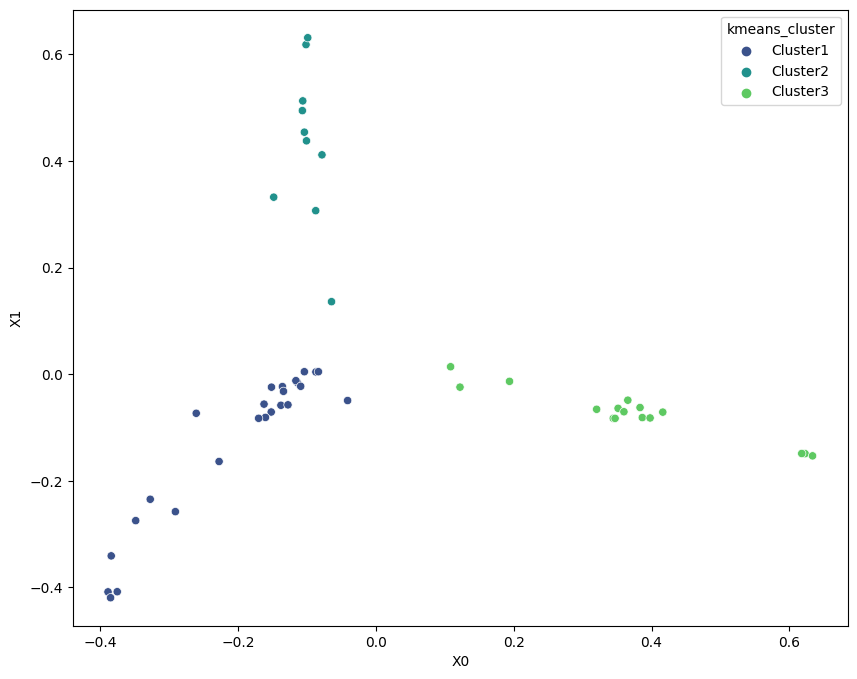

In [192]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))
plt.xlabel('X0')
plt.ylabel('X1')
sns.scatterplot(data = opinion_df, x = 'x0', y = 'x1', hue = 'kmeans_cluster', palette = 'viridis')
plt.show()

<br>

### 리뷰 문서 유사도 측정

- 문서별 텍스트에 대한 Tf-IDF 벡터 데이터프레임

In [200]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range = (1, 2), min_df = 0.05, max_df = 0.85)
tfidf_vectors = tfidf.fit_transform(opinion_df['opinion'])

word_id_list = sorted(tfidf.vocabulary_.items(), key=lambda x: x[1], reverse=False)  
word_list = [x[0] for x in word_id_list] 

tf_idf_df = pd.DataFrame(tfidf_vectors.toarray(),
                         columns=word_list,
                         index=opinion_df['filename'])
tf_idf_df.head()
print(tf_idf_df.shape)

(51, 4400)


<br>

- 문서간 코사인 유사도

In [201]:
cos_sim_df = pd.DataFrame(cosine_similarity(tf_idf_df, tf_idf_df),
                          columns=opinion_df['filename'],
                          index=opinion_df['filename'])

In [204]:
cos_sim_df.head()

filename,buttons_amazon_kindle,gas_mileage_toyota_camry_2007,speed_windows7,features_windows7,rooms_swissotel_chicago,interior_honda_accord_2008,battery-life_ipod_nano_8gb,location_bestwestern_hotel_sfo,staff_swissotel_chicago,rooms_bestwestern_hotel_sfo,...,food_holiday_inn_london,location_holiday_inn_london,performance_honda_accord_2008,navigation_amazon_kindle,screen_ipod_nano_8gb,mileage_honda_accord_2008,keyboard_netbook_1005ha,display_garmin_nuvi_255W_gps,seats_honda_accord_2008,price_holiday_inn_london
filename,,,,,,,,,,,,,,,,,,,,,
buttons_amazon_kindle,1.000000,0.007428,0.033484,0.026492,0.011367,0.020531,0.024574,0.012200,0.009760,0.016082,...,0.007699,0.012473,0.012150,0.375904,0.064558,0.007297,0.107837,0.066709,0.011569,0.014282
gas_mileage_toyota_camry_2007,0.007428,1.000000,0.010895,0.009395,0.008045,0.053951,0.005736,0.010324,0.005438,0.007817,...,0.007195,0.009536,0.201402,0.007033,0.009177,0.967277,0.009351,0.011693,0.055414,0.011133
speed_windows7,0.033484,0.010895,1.000000,0.233244,0.017194,0.021248,0.024695,0.009018,0.014621,0.018849,...,0.038942,0.012199,0.050386,0.088778,0.031825,0.013859,0.053680,0.022519,0.012523,0.018028
features_windows7,0.026492,0.009395,0.233244,1.000000,0.016610,0.036438,0.030700,0.006988,0.011319,0.012751,...,0.009063,0.012141,0.020007,0.067710,0.138032,0.013960,0.032189,0.045460,0.016209,0.016636
rooms_swissotel_chicago,0.011367,0.008045,0.017194,0.016610,1.000000,0.023080,0.007854,0.176701,0.157982,0.915255,...,0.065881,0.171009,0.010033,0.011056,0.012141,0.008625,0.014468,0.013405,0.015233,0.122553


<br>

- DBSCAN 군집이 0인 문서

In [219]:
cluster1_indexes = opinion_df[opinion_df['dbscan_cluster'] == 0].index
print(cluster1_indexes)

opinion_df.iloc[cluster1_indexes]

Int64Index([4, 7, 9, 15, 19, 24, 32, 34, 35, 38, 41, 42, 50], dtype='int64')


,filename,opinion,dbscan_cluster,kmeans_cluster,x0,x1
4,rooms_swissotel_chicago,...,0,Cluster3,0.365549,-0.048657
7,location_bestwestern_hotel_sfo,...,0,Cluster3,0.351427,-0.063921
9,rooms_bestwestern_hotel_sfo,...,0,Cluster3,0.383279,-0.062433
15,food_swissotel_chicago,...,0,Cluster3,0.344431,-0.082615
19,room_holiday_inn_london,...,0,Cluster3,0.416282,-0.071048
24,service_bestwestern_hotel_sfo,...,0,Cluster3,0.622786,-0.148917
32,service_holiday_inn_london,...,0,Cluster3,0.633619,-0.153088
34,bathroom_bestwestern_hotel_sfo,...,0,Cluster3,0.193879,-0.013317
35,service_swissotel_hotel_chicago,...,0,Cluster3,0.617916,-0.148689
38,price_amazon_kindle,...,0,Cluster1,-0.041066,-0.049316


In [220]:
cluster1_file_name = opinion_df.iloc[cluster1_indexes[0]]['filename']
print(cluster1_file_name)

rooms_swissotel_chicago


- ```rooms_swissotel_chicago``` 문서와, 해당 문서가 속한 군집의 다른 문서들간의 코사인유사도

In [242]:
similarity = cosine_similarity(tfidf_vectors[cluster1_indexes[0]], tfidf_vectors[cluster1_indexes])
print(similarity)

[[1.         0.17670058 0.91525545 0.05237345 0.34173221 0.20898203
  0.18854619 0.19378285 0.23381074 0.01558952 0.06588125 0.17100934
  0.122553  ]]


<br>

<br>

## 계층적 군집화(Hierarchical Clustering)

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




<br> 

### 병합 군집화(Agglomerative Clustering)

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지(ward, average, complete)를 지정 가능

<br> 

#### **```sklearn.cluster.AgglomerativeClustering(n_cluster, linkage)```**
- ```linkage``` : 'ward', 'average', 'complete'

<br> 

`ward`: 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)

In [252]:
from sklearn.cluster import AgglomerativeClustering 

ward = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
predict = ward.fit_predict(tfidf_vectors.toarray())

opinion_df['agg_ward_clusters'] = predict

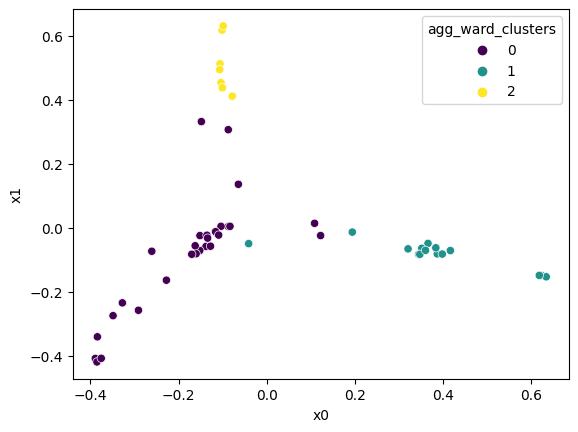

In [256]:
sns.scatterplot(x='x0', y='x1', data = opinion_df, hue='agg_ward_clusters', palette = 'viridis')
plt.show()

<br> 

`average`: 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침

In [257]:
from sklearn.cluster import AgglomerativeClustering 

ward = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
predict = ward.fit_predict(tfidf_vectors.toarray())

opinion_df['avg_ward_clusters'] = predict

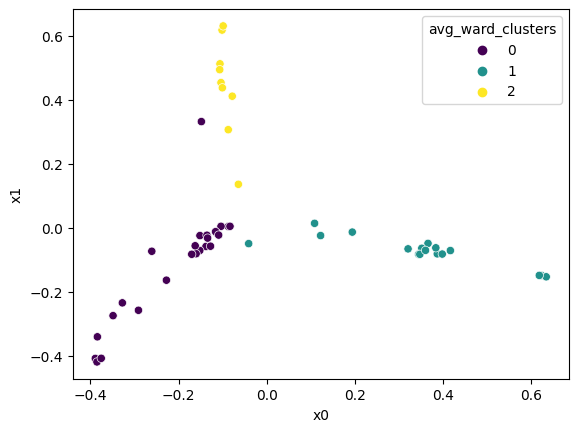

In [258]:
sns.scatterplot(x='x0', y='x1', data = opinion_df, hue='avg_ward_clusters', palette = 'viridis')
plt.show()

<br> 

`complete`: 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

In [259]:
from sklearn.cluster import AgglomerativeClustering 

ward = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
predict = ward.fit_predict(tfidf_vectors.toarray())

opinion_df['compl_ward_clusters'] = predict

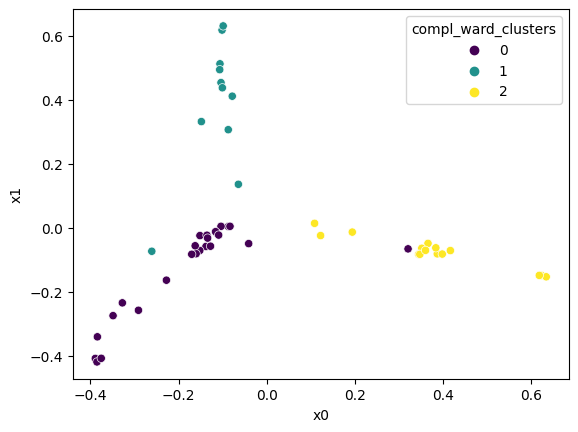

In [260]:
sns.scatterplot(x='x0', y='x1', data = opinion_df, hue='compl_ward_clusters', palette = 'viridis')
plt.show()

<br> 

### 덴드로그램(Dendrogram)

#### `pdist`를 이용한 각 문서간 유클리디안 거리 계산
* 각 문서간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

<br>

#### **```pdist(배열, metric)```**
- ```metric``` : 'euclidean'

In [262]:
tfidf_vectors.toarray().shape

(51, 4400)

In [273]:
from scipy.spatial.distance import pdist, squareform 
from scipy.cluster.hierarchy import linkage, dendrogram 

distmatrix = pdist(tfidf_vectors.toarray(), metric='euclidean')
print(distmatrix.shape)

row_dist = pd.DataFrame(squareform(distmatrix)) 
print(row_dist.shape)
row_dist.head()

(1275,)
(51, 51)


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.000000,1.408951,1.390335,1.395355,1.406153,1.399621,1.396729,1.405560,1.407296,1.402796,...,1.408759,1.405366,1.405596,1.117225,1.367803,1.409044,1.335787,1.366229,1.406009,1.404079
1,1.408951,0.000000,1.406488,1.407554,1.408513,1.375536,1.410151,1.406894,1.410363,1.408675,...,1.409117,1.407454,1.263802,1.409231,1.407709,0.255825,1.407586,1.405921,1.374471,1.406319
2,1.390335,1.406488,0.000000,1.238351,1.402003,1.399108,1.396642,1.407823,1.403837,1.400822,...,1.386404,1.405561,1.378125,1.349979,1.391528,1.404380,1.375733,1.398200,1.405331,1.401408
3,1.395355,1.407554,1.238351,0.000000,1.402420,1.388209,1.392336,1.409264,1.406187,1.405169,...,1.407790,1.405602,1.399995,1.365496,1.312987,1.404308,1.391266,1.381695,1.402706,1.402401
4,1.406153,1.408513,1.402003,1.402420,0.000000,1.397798,1.408649,1.283199,1.297704,0.411691,...,1.366835,1.287626,1.407101,1.406374,1.405602,1.408102,1.403946,1.404703,1.403401,1.324724


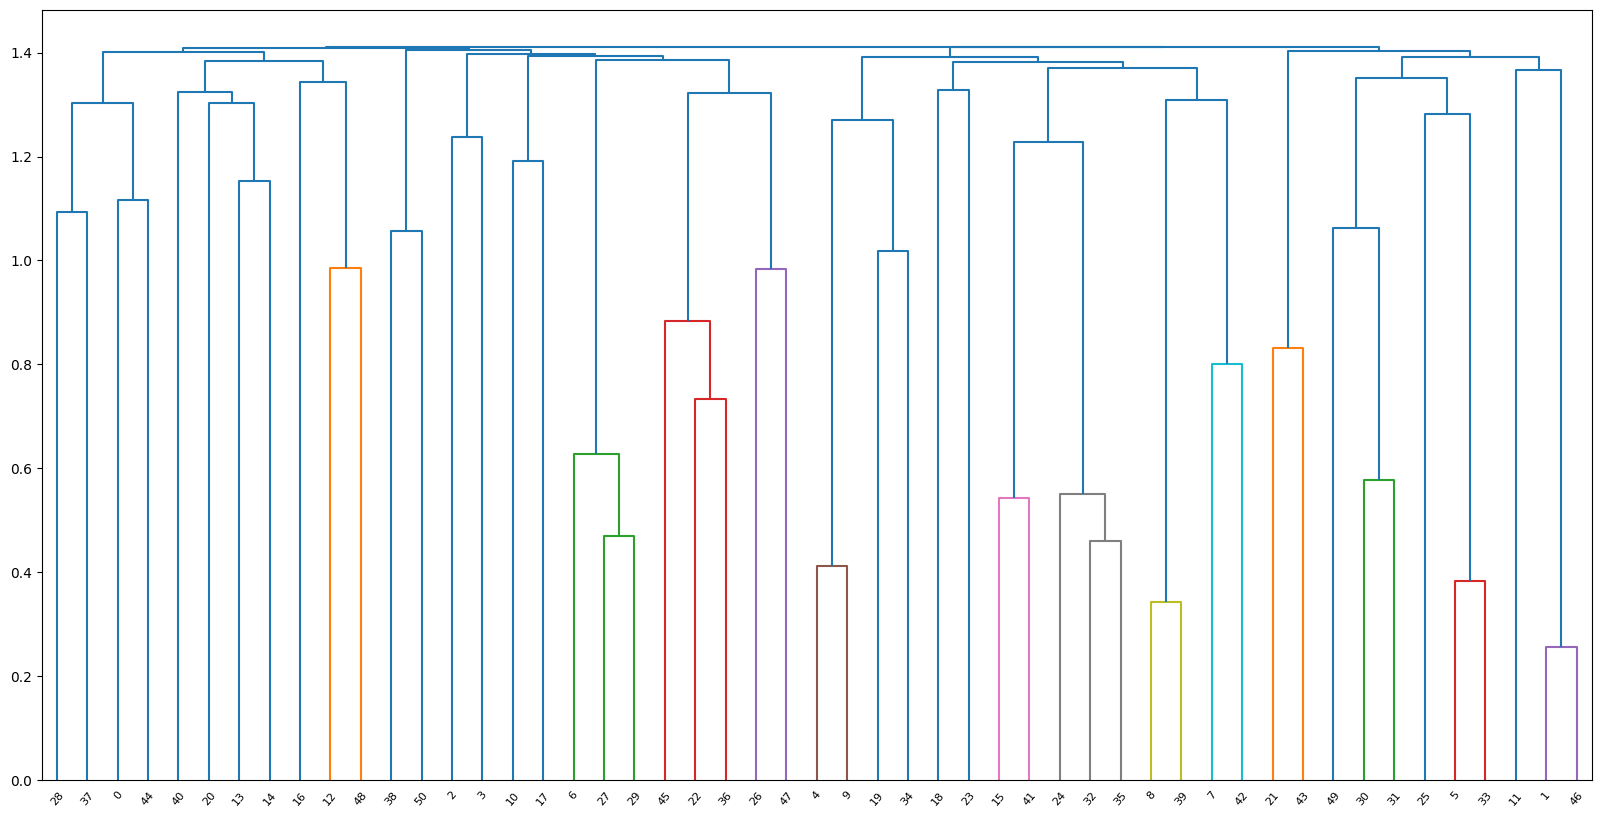

In [274]:
row_clusters = linkage(distmatrix, method = 'complete')

plt.figure(figsize=(20, 10))
dendrogram(row_clusters, leaf_rotation=50, leaf_font_size=8)
plt.show()

<br> 

#### 각 문서간 코사인 유사도를 이용한 군집 분석 및 덴드로그램 시각화

In [275]:
distmatrix = pdist(tfidf_vectors.toarray(), metric='cosine')
print(distmatrix.shape)

row_dist = pd.DataFrame(squareform(distmatrix)) 
print(row_dist.shape)
row_dist.head()

(1275,)
(51, 51)


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.000000,0.992572,0.966516,0.973508,0.988633,0.979469,0.975426,0.987800,0.990240,0.983918,...,0.992301,0.987527,0.987850,0.624096,0.935442,0.992703,0.892163,0.933291,0.988431,0.985718
1,0.992572,0.000000,0.989105,0.990605,0.991955,0.946049,0.994264,0.989676,0.994562,0.992183,...,0.992805,0.990464,0.798598,0.992967,0.990823,0.032723,0.990649,0.988307,0.944586,0.988867
2,0.966516,0.989105,0.000000,0.766756,0.982806,0.978752,0.975305,0.990982,0.985379,0.981151,...,0.961058,0.987801,0.949614,0.911222,0.968175,0.986141,0.946320,0.977481,0.987477,0.981972
3,0.973508,0.990605,0.766756,0.000000,0.983390,0.963562,0.969300,0.993012,0.988681,0.987249,...,0.990937,0.987859,0.979993,0.932290,0.861968,0.986040,0.967811,0.954540,0.983791,0.983364
4,0.988633,0.991955,0.982806,0.983390,0.000000,0.976920,0.992146,0.823299,0.842018,0.084745,...,0.934119,0.828991,0.989967,0.988944,0.987859,0.991375,0.985532,0.986595,0.984767,0.877447


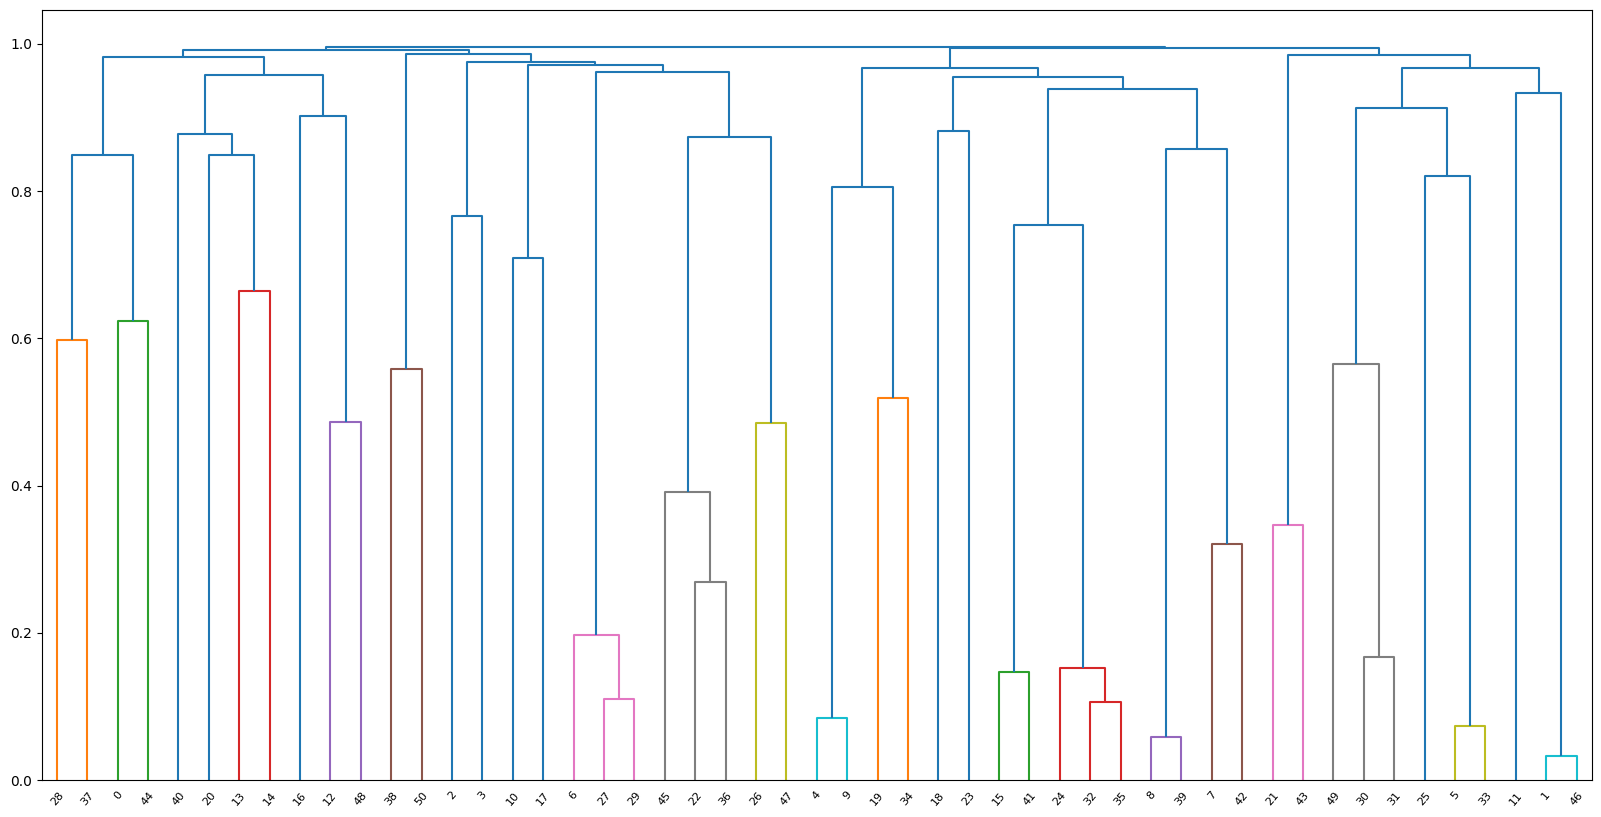

In [276]:
row_clusters = linkage(distmatrix, method = 'complete')

plt.figure(figsize=(20, 10))
dendrogram(row_clusters, leaf_rotation=50, leaf_font_size=8)
plt.show()

<br> 

<br> 

## 뉴스그룹 군집 분석

<br> 

### 데이터 로드 및 전처리

In [340]:
from sklearn.datasets import fetch_20newsgroups 

news = fetch_20newsgroups(subset = 'train', shuffle = True, remove = ('headers', 'footers', 'quotes'))
df = pd.DataFrame(news.data, columns=['corpus'])
print(df.shape)
df.head()

(11314, 1)


,corpus
0,I was wondering if anyone out there could enli...
1,A fair number of brave souls who upgraded thei...
2,"well folks, my mac plus finally gave up the gh..."
3,\nDo you have Weitek's address/phone number? ...
4,"From article <C5owCB.n3p@world.std.com>, by to..."


In [341]:
import re 
from nltk.corpus import stopwords 
nltk.download('stopwords')

def preprocess_text(text):
  text = re.sub(r'http\S+', '', text)
  text = re.sub('[^A-Za-z]+', ' ', text)
  
  tokens = nltk.word_tokenize(text)
  tokens = [w for w in tokens if not w.lower() in stopwords.words('english')]
  text = ' '.join(tokens) 
  text = text.lower()

  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [342]:
df['cleaned'] = df['corpus'].apply(lambda x: preprocess_text(str(x)))

In [343]:
df['cleaned'].head()

0    wondering anyone could enlighten car saw day d...
1    fair number brave souls upgraded si clock osci...
2    well folks mac plus finally gave ghost weekend...
3    weitek address phone number like get informati...
4    article c owcb n p world std com tombaker worl...
Name: cleaned, dtype: object

<br> 

### K-means 군집화

In [344]:
vectorizer = TfidfVectorizer(sublinear_tf = True, min_df =5, max_df = 0.95)

x = vectorizer.fit_transform(df['cleaned'])

In [345]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(x)

clusters = kmeans.labels_
df['cluster'] = clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [346]:
print(df.shape)
print(x.shape)

(11314, 3)
(11314, 16265)


In [347]:
pca = PCA(n_components=2, random_state=42)

pca_vecs = pca.fit_transform(x.toarray())

df['x0'] = pca_vecs[:, 0]
df['x1'] = pca_vecs[:, 1]


<br>

- 군집별로 Tf-Idf 벡터값 평균 계산

In [348]:
clusters.shape

(11314,)

In [349]:
cluster_mean = pd.DataFrame(x.toarray()).groupby(clusters).mean()
terms = vectorizer.get_feature_names_out() 

for i, r in cluster_mean.iterrows():
  print('Cluster : {}'.format(i))
  print(', '.join([terms[t] for t in np.argsort(r)[-10:]]))

Cluster : 0
well, even, know, say, like, god, think, one, would, people
Cluster : 1
time, new, good, know, edu, think, get, like, would, one
Cluster : 2
mail, get, card, would, use, know, please, anyone, windows, thanks


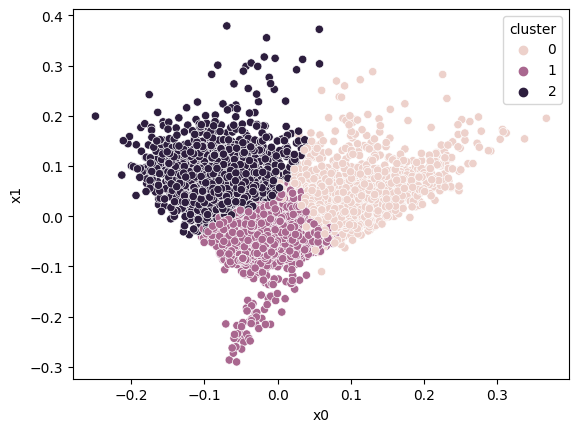

In [352]:
sns.scatterplot(data = df, x = 'x0', y = 'x1', hue = 'cluster')
plt.show()

<br> 

### 병합 군집화

In [353]:
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
predict = ward.fit_predict(x.toarray())

In [355]:
results = df 
results['results'] = predict
results[:10]

,corpus,cleaned,cluster,x0,x1,results
0,I was wondering if anyone out there could enli...,wondering anyone could enlighten car saw day d...,1,-0.035129,0.027513,0
1,A fair number of brave souls who upgraded thei...,fair number brave souls upgraded si clock osci...,2,-0.076532,0.019102,2
2,"well folks, my mac plus finally gave up the gh...",well folks mac plus finally gave ghost weekend...,2,-0.002826,0.126172,0
3,\nDo you have Weitek's address/phone number? ...,weitek address phone number like get informati...,2,-0.053311,0.036368,2
4,"From article <C5owCB.n3p@world.std.com>, by to...",article c owcb n p world std com tombaker worl...,1,-0.008503,0.007069,2
5,\n\n\n\n\nOf course. The term must be rigidly...,course term must rigidly defined bill doubt us...,1,0.048859,-0.017859,0
6,There were a few people who responded to my re...,people responded request info treatment astroc...,2,-0.056961,0.000219,0
7,...,shows know much scsi scsi scsi controler chip ...,2,-0.093744,0.153598,2
8,I have win 3.0 and downloaded several icons an...,win downloaded several icons bmp figure change...,2,-0.064824,0.010195,2
9,"\n\n\nI've had the board for over a year, and ...",board year work diskdoubler autodoubler due li...,2,-0.036241,0.065579,2


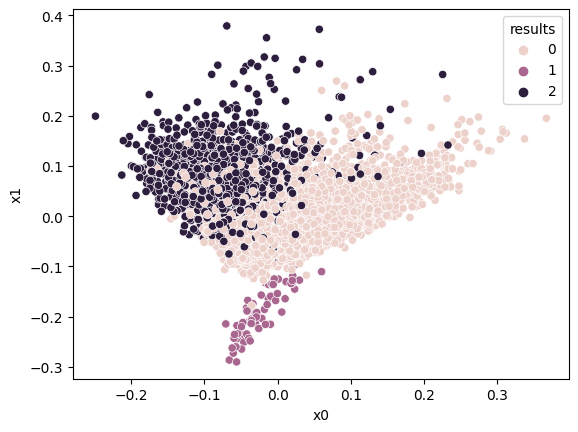

In [358]:
sns.scatterplot(data=results, x='x0', y='x1', hue='results')
plt.show()